<a href="https://colab.research.google.com/github/shadiyahamza/assignment/blob/main/SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath_train = '/content/drive/MyDrive/DSA_Notes/Data Sets/Supervised_Learning_Case_Study/Training_data.csv'
filepath_test = '/content/drive/MyDrive/DSA_Notes/Data Sets/Supervised_Learning_Case_Study/Testing_data.csv'

# **Exploratory Data Analysis (EDA)**

In [ ]:
df_train = pd.read_csv('/content/Training_data.csv')
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [ ]:
df_test = pd.read_csv('/content/Testing_data.csv')
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [ ]:
df_train.size

118314

In [ ]:
df_test.size

29589

In [ ]:
df_train.shape

(5634, 21)

In [ ]:
df_test.shape

(1409, 21)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [ ]:
df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [ ]:
df_test.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


In [ ]:
df_train.nunique()

,0
customerID,5634
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


# **Preprocessing**

## **Data Cleaning**

In [ ]:
filepath = '/content/Testing_data.csv'
df_test = pd.read_csv(filepath)
df_test.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [ ]:
filepath = '/content/Training_data.csv'
df_train = pd.read_csv(filepath)
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


### Remove unwanted columns

In [ ]:
df_train.drop(columns=['customerID', 'Partner', 'Dependents'], inplace=True)
df_test.drop(columns=['customerID', 'Partner', 'Dependents'], inplace=True)

In [ ]:
df_train['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [ ]:
df_train['OnlineSecurity'].unique()

array(['No internet service', 'No', nan, 'Yes'], dtype=object)

In [ ]:
df_train['OnlineBackup'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [ ]:
df_train['DeviceProtection'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [ ]:
df_train['TechSupport'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [ ]:
df_train['StreamingTV'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [ ]:
df_train['StreamingMovies'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [ ]:
df_train['MultipleLines'] = df_train['MultipleLines'].replace('No phone service', 'No')
df_train['OnlineSecurity'] = df_train['OnlineSecurity'].replace('No internet service', 'No')
df_train['OnlineBackup'] = df_train['OnlineBackup'].replace('No internet service', 'No')
df_train['DeviceProtection'] = df_train['DeviceProtection'].replace('No internet service', 'No')
df_train['TechSupport'] = df_train['TechSupport'].replace('No internet service', 'No')
df_train['StreamingTV'] = df_train['StreamingTV'].replace('No internet service', 'No')
df_train['StreamingMovies'] = df_train['StreamingMovies'].replace('No internet service', 'No')

In [ ]:
df_train.nunique()

,0
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2


In [ ]:
df_test.nunique()

,0
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3
TechSupport,3


In [ ]:
df_test['MultipleLines'] = df_test['MultipleLines'].replace('No phone service', 'No')
df_test['OnlineSecurity'] = df_test['OnlineSecurity'].replace('No internet service', 'No')
df_test['OnlineBackup'] = df_test['OnlineBackup'].replace('No internet service', 'No')
df_test['DeviceProtection'] = df_test['DeviceProtection'].replace('No internet service', 'No')
df_test['TechSupport'] = df_test['TechSupport'].replace('No internet service', 'No')
df_test['StreamingTV'] = df_test['StreamingTV'].replace('No internet service', 'No')
df_test['StreamingMovies'] = df_test['StreamingMovies'].replace('No internet service', 'No')

In [ ]:
df_test.nunique()

,0
gender,2
SeniorCitizen,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2
TechSupport,2


### Duplicate Removal

In [ ]:
df_train[df_train.duplicated()].index

Index([ 737, 1442, 1845, 2117, 2618, 2988, 3596, 3757, 3995, 4348, 4439, 4637,
       5145, 5309, 5456],
      dtype='int64')

In [ ]:
df_train.T[df_train.T.duplicated()].index

Index([], dtype='object')

In [ ]:
df_test[df_test.duplicated()].index

Index([571, 1175], dtype='int64')

In [ ]:
df_test.T[df_test.T.duplicated()].index

Index([], dtype='object')

### Handling Missing Values

In [ ]:
df_train.isna().sum()

,0
gender,169
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [ ]:
df_train['gender'].ffill(inplace=True)

/tmp/ipython-input-282050689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['gender'].ffill(inplace=True)


In [ ]:
df_train.OnlineSecurity = df_train.OnlineSecurity.fillna(df_train.OnlineSecurity.mode()[0])

/tmp/ipython-input-3509006001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_train, palette='pastel')


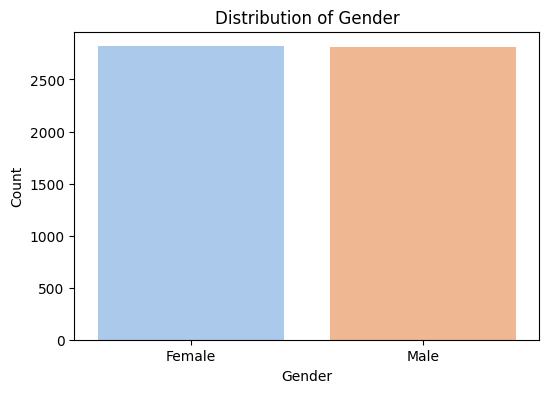

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df_train, palette='pastel')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [ ]:
df_train.OnlineSecurity = df_train.OnlineSecurity.fillna(df_train.OnlineSecurity.mode()[0])

In [ ]:
df_train.isna().sum()

,0
gender,0
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [ ]:
df_train['MonthlyCharges'].isnull().mean() * 100

np.float64(6.993255236066738)

In [ ]:
df_train['TotalCharges'].isnull().mean() * 100

np.float64(4.98757543485978)

In [ ]:
df_train.MonthlyCharges = df_train.MonthlyCharges.fillna(df_train.MonthlyCharges.mean())

In [ ]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

In [ ]:
df_train.TotalCharges = df_train.TotalCharges.fillna(df_train.TotalCharges.mean())

In [ ]:
df_train.isna().sum()

,0
gender,0
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [ ]:
df_train.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,35,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.75,700.45,No
1,Female,0,28,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,Male,0,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,Male,0,39,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,Female,0,43,No,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No


In [ ]:
df_test.isna().sum()

,0
gender,0
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [ ]:
df_train['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,4734
1,900


### Outlier Removal

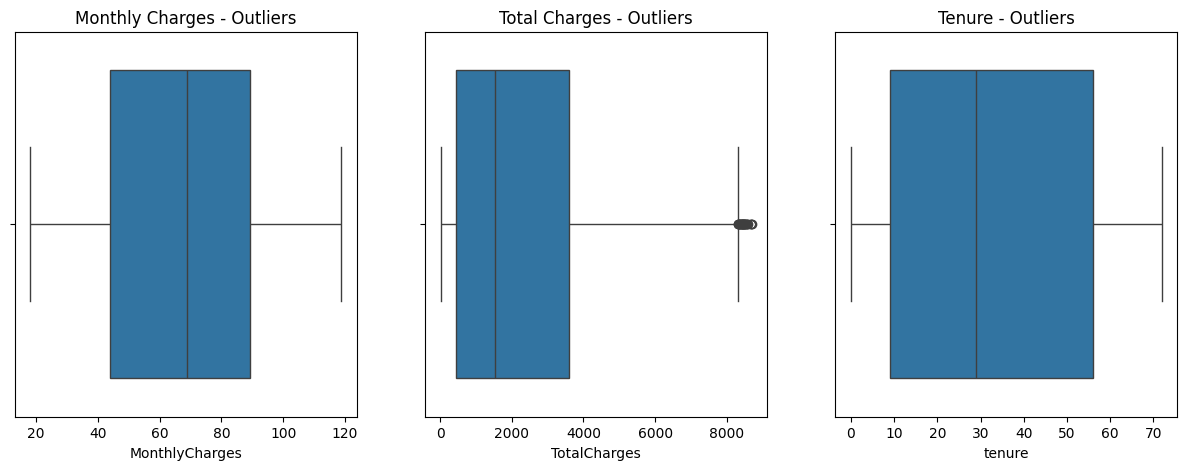

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df_train['MonthlyCharges'])
plt.title('Monthly Charges - Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_train['TotalCharges'])
plt.title('Total Charges - Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_train['tenure'])
plt.title('Tenure - Outliers')
plt.show()


Q1 = df_train['MonthlyCharges'].quantile(0.25)
Q3 = df_train['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[(df_train['MonthlyCharges'] >= lower_bound) & (df_train['MonthlyCharges'] <= upper_bound)]

In [ ]:
#handling outliers by clipping
Q1_total = df_train['TotalCharges'].quantile(0.25)
Q3_total = df_train['TotalCharges'].quantile(0.75)
IQR_total = Q3_total - Q1_total

lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

df_train['TotalCharges'] = df_train['TotalCharges'].clip(lower=lower_bound_total, upper=upper_bound_total)

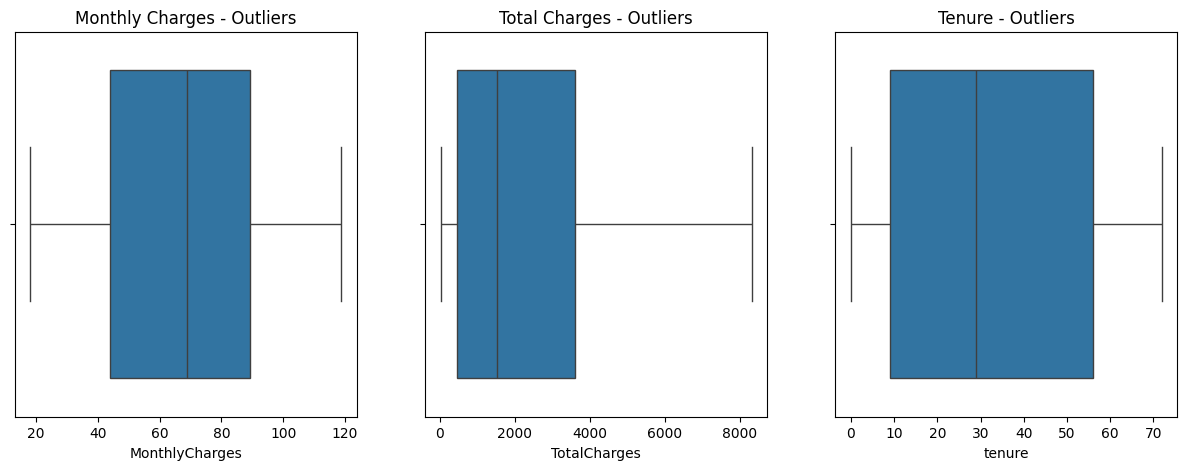

In [ ]:
#checking if the outlier is handled or not
#outlier handling
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df_train['MonthlyCharges'])
plt.title('Monthly Charges - Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_train['TotalCharges'])
plt.title('Total Charges - Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_train['tenure'])
plt.title('Tenure - Outliers')
plt.show()


Q1 = df_train['MonthlyCharges'].quantile(0.25)
Q3 = df_train['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[(df_train['MonthlyCharges'] >= lower_bound) & (df_train['MonthlyCharges'] <= upper_bound)]
#outlier detected and handled

## **Scaling**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   tenure            5634 non-null   int64  
 3   PhoneService      5634 non-null   object 
 4   MultipleLines     5634 non-null   object 
 5   InternetService   5634 non-null   object 
 6   OnlineSecurity    5634 non-null   object 
 7   OnlineBackup      5634 non-null   object 
 8   DeviceProtection  5634 non-null   object 
 9   TechSupport       5634 non-null   object 
 10  StreamingTV       5634 non-null   object 
 11  StreamingMovies   5634 non-null   object 
 12  Contract          5634 non-null   object 
 13  PaperlessBilling  5634 non-null   object 
 14  PaymentMethod     5634 non-null   object 
 15  MonthlyCharges    5634 non-null   float64
 16  TotalCharges      5634 non-null   float64


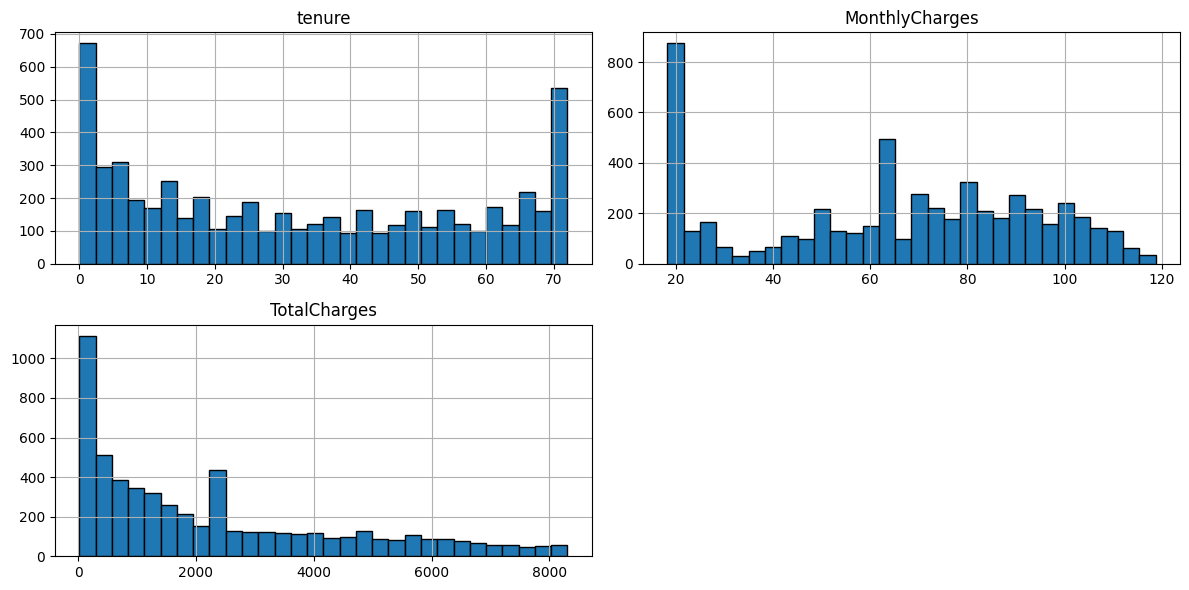

In [ ]:
desired_columns = ['tenure', 'MonthlyCharges','TotalCharges']

# Plot histograms for selected columns of train data set
df_train[desired_columns].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
min_max_scale = MinMaxScaler(feature_range=(0,1))

df_train['tenure'] = min_max_scale.fit_transform(df_train[['tenure']])
df_train['MonthlyCharges'] = min_max_scale.fit_transform(df_train[['MonthlyCharges']])

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')
# Impute missing values after converting to numeric
df_train['TotalCharges'] = df_train['TotalCharges'].fillna(df_train['TotalCharges'].mean())

df_train['TotalCharges'] = min_max_scale.fit_transform(df_train[['TotalCharges']])

In [ ]:
df_train.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,0.486111,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0.024876,0.082235,No
1,Female,0,0.388889,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,0.174129,0.113719,No
2,Male,0,0.777778,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,0.799502,0.671082,No
3,Male,0,0.541667,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),0.021891,0.093040,No
4,Female,0,0.597222,No,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.328358,0.257317,No


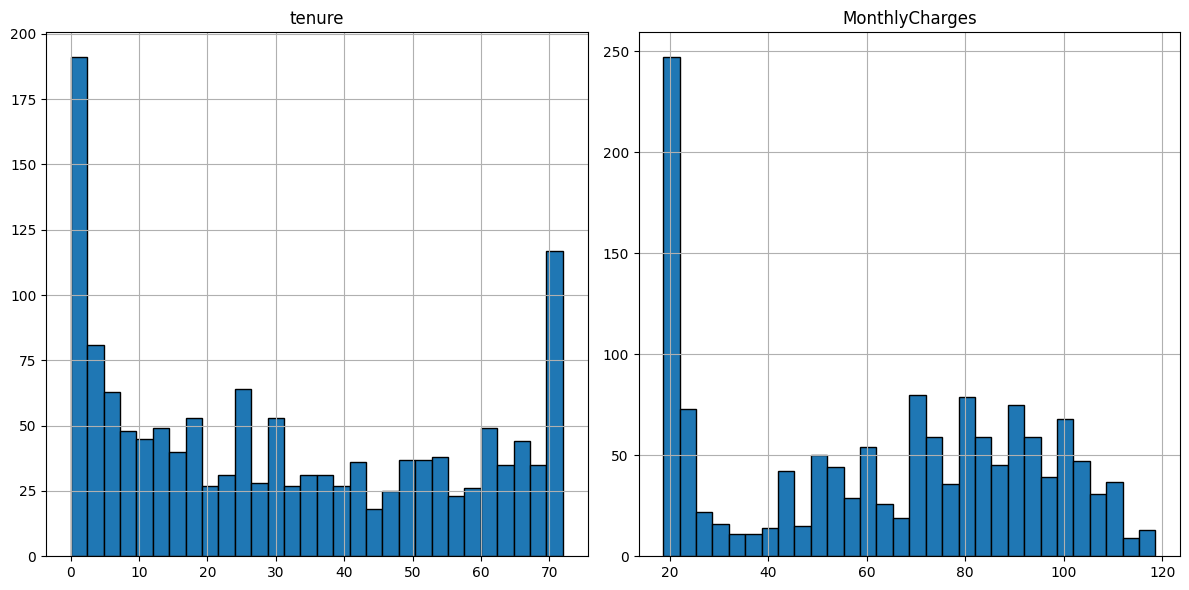

In [ ]:
# Plot histograms for selected columns of test data set
df_test[desired_columns].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
min_max_scale = MinMaxScaler(feature_range=(0,1))

df_test['tenure'] = min_max_scale.fit_transform(df_test[['tenure']])
df_test['MonthlyCharges'] = min_max_scale.fit_transform(df_test[['MonthlyCharges']])

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')
# Impute missing values after converting to numeric
df_test['TotalCharges'] = df_test['TotalCharges'].fillna(df_test['TotalCharges'].mean())

df_test['TotalCharges'] = min_max_scale.fit_transform(df_test[['TotalCharges']])

In [ ]:
df_test.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,0.555556,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.625626,0.383837,No
1,Female,0,0.166667,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,0.602102,0.100600,No
2,Male,0,0.597222,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,0.813814,0.491625,Yes
3,Male,0,1.000000,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0.995996,1.000000,No
4,Female,0,0.138889,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,0.175676,0.041649,No


## **Feature Engineering**

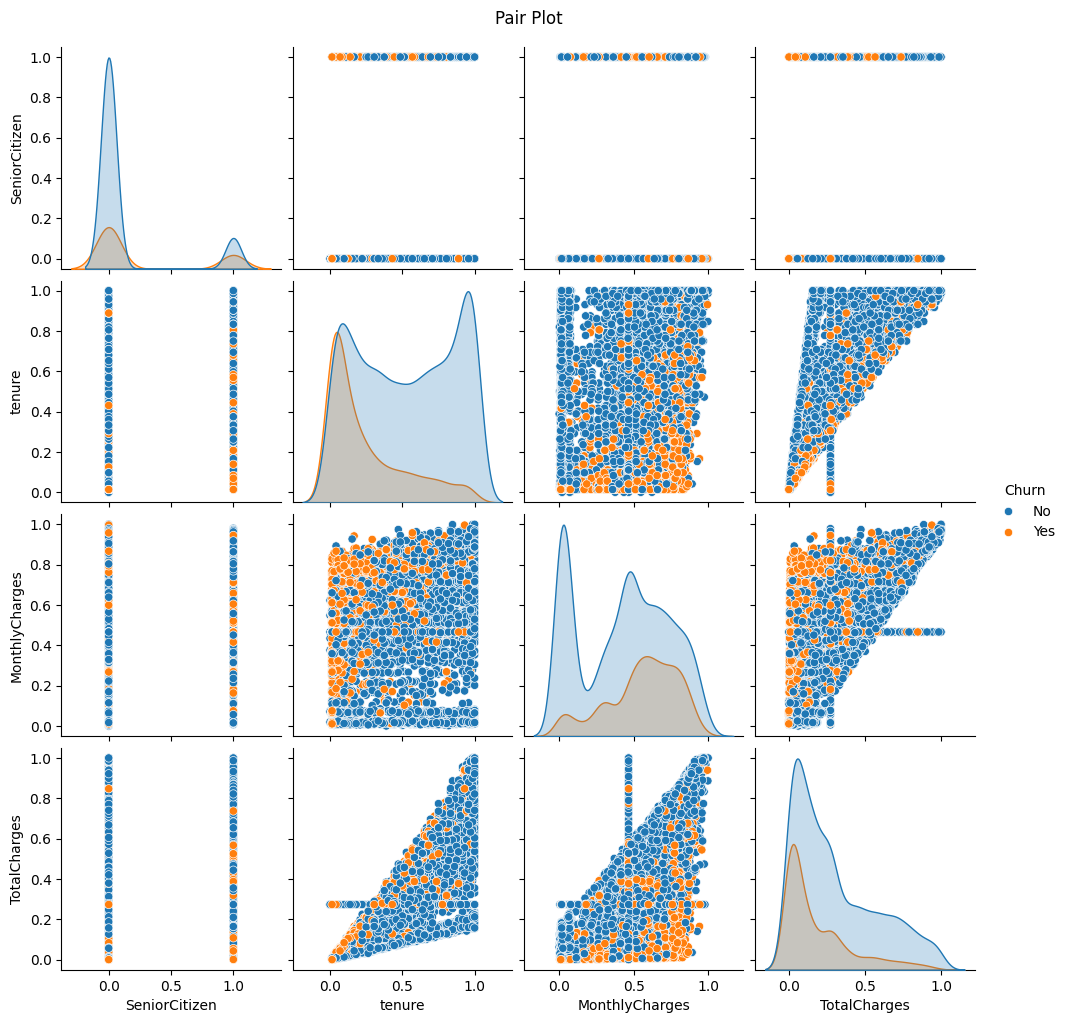

In [ ]:
sns.pairplot(data=df_train,hue='Churn')
plt.suptitle("Pair Plot", y=1.02)
plt.show()

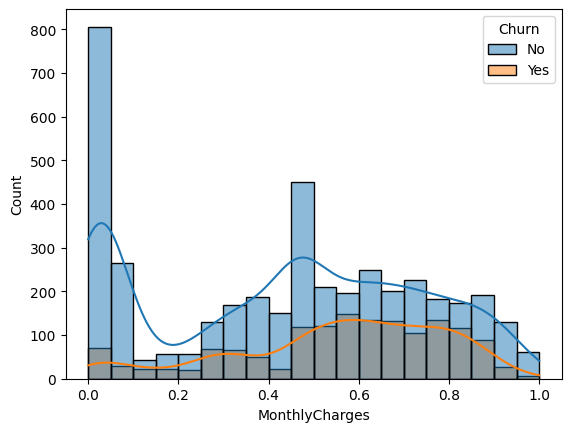

In [ ]:
sns.histplot(data=df_train, x='MonthlyCharges', kde=True, hue='Churn')
plt.show()

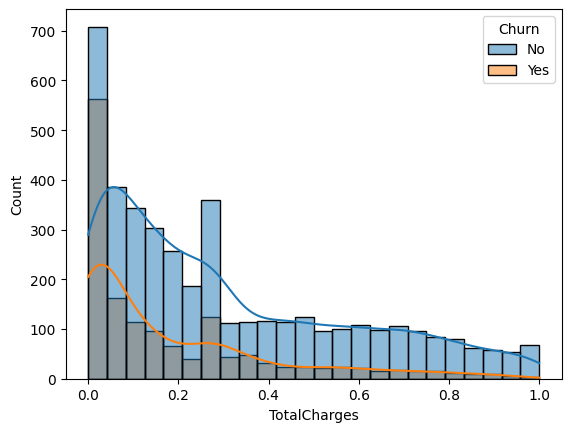

In [ ]:
sns.histplot(data=df_train, x='TotalCharges', kde=True, hue='Churn')
plt.show()

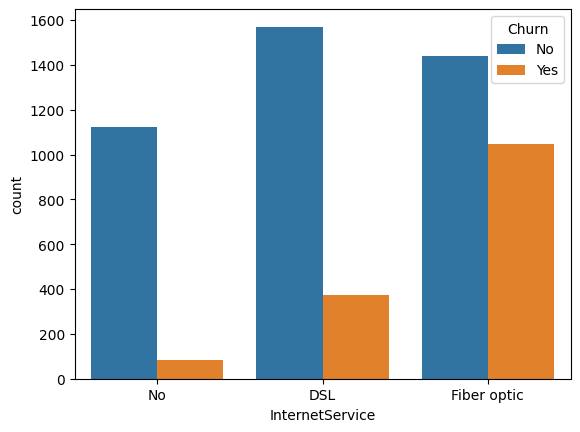

In [ ]:
sns.countplot(data=df_train, x='InternetService', hue='Churn')
plt.show()

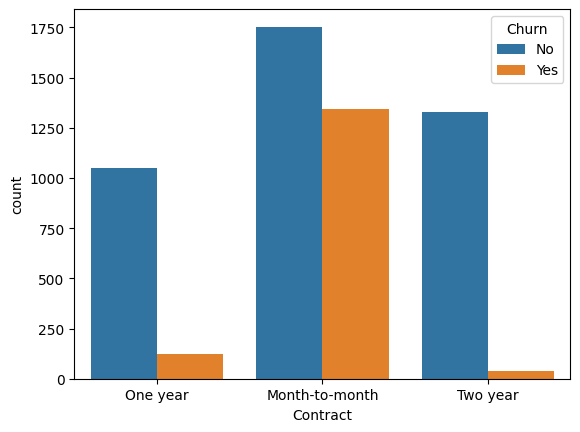

In [ ]:
sns.countplot(data=df_train, x='Contract', hue='Churn')
plt.show()

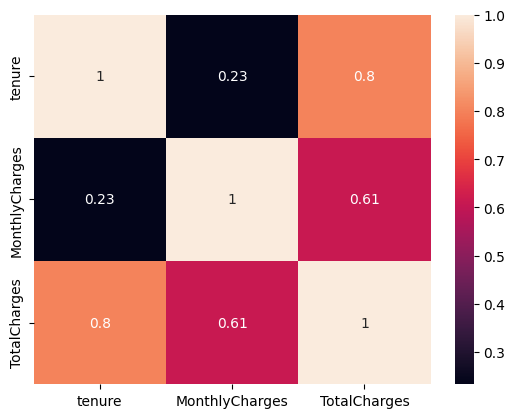

In [ ]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df_train[num_features].corr(), annot=True)
plt.show()

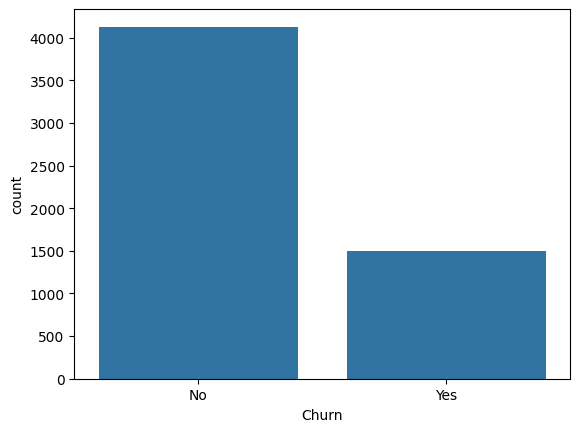

In [ ]:
sns.countplot(data=df_train, x='Churn')
plt.show()

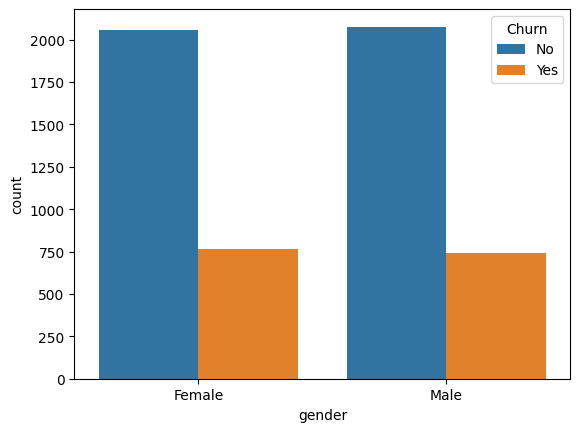

In [ ]:
sns.countplot(data=df_train, x='gender', hue='Churn')
plt.show()

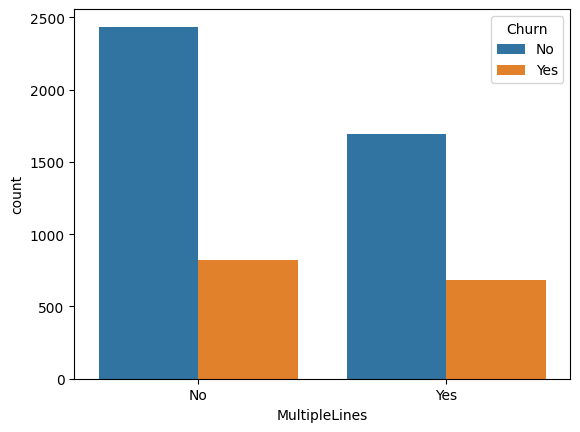

In [ ]:
sns.countplot(data=df_train, x='MultipleLines', hue='Churn')
plt.show()

## **Encoding**



###**Label encoding**

In [ ]:
# Label Encoding for target(Churn)
label_enc = LabelEncoder()
df_train['Churn'] = label_enc.fit_transform(df_train['Churn'])
df_test['Churn'] = label_enc.fit_transform(df_test['Churn'])

In [ ]:
df_train['InternetService'] = label_enc.fit_transform(df_train['InternetService'])
df_test['InternetService'] = label_enc.fit_transform(df_test['InternetService'])

In [ ]:
df_train['PaymentMethod'] = label_enc.fit_transform(df_train['PaymentMethod'])
df_test['PaymentMethod'] = label_enc.fit_transform(df_test['PaymentMethod'])

### **Ordinal encoding**

In [ ]:
contract_order = ['Month-to-month', 'One year', 'Two year']
ordinal_enc = OrdinalEncoder(categories=[contract_order])

In [ ]:
df_train['Contract'] = ordinal_enc.fit_transform(df_train[['Contract']])
df_test['Contract'] = ordinal_enc.fit_transform(df_test[['Contract']])

### One-Hot Encoding

In [ ]:
df_train = pd.get_dummies(df_train,\
                          columns=['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
                                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'],\
                          dtype=int, drop_first=True)

In [ ]:
df_test = pd.get_dummies(df_test,\
                          columns=['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
                                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'],\
                          dtype=int, drop_first=True)

In [ ]:
df_train.head()

,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,Female,0,0.486111,2,1.0,3,0.024876,0.082235,0,1,0,0,0,0,0,0,0,0
1,Female,0,0.388889,0,0.0,3,0.174129,0.113719,0,0,0,0,0,1,1,0,0,1
2,Male,0,0.777778,1,0.0,2,0.799502,0.671082,0,1,1,0,1,0,0,1,1,0
3,Male,0,0.541667,2,2.0,0,0.021891,0.093040,0,1,0,0,0,0,0,0,0,1
4,Female,0,0.597222,0,1.0,0,0.328358,0.257317,0,0,0,0,1,0,1,1,0,1


In [ ]:
df_test.head()

,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,Male,0,0.555556,1,0.0,2,0.625626,0.383837,0,1,1,0,0,1,0,0,0,1
1,Female,0,0.166667,0,1.0,2,0.602102,0.100600,0,1,1,1,0,1,0,1,1,0
2,Male,0,0.597222,1,1.0,2,0.813814,0.491625,1,1,1,0,0,0,1,1,1,1
3,Male,0,1.000000,1,2.0,2,0.995996,1.000000,0,1,1,1,1,1,1,1,1,1
4,Female,0,0.138889,0,0.0,2,0.175676,0.041649,0,0,0,0,1,0,1,0,0,0


# **Classification**

## **Model Building**

In [ ]:
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']


In [ ]:
models = {
           "Logistic Regression": LogisticRegression(max_iter=1000),
           "SVM": SVC(),
           "Naive Bayes": GaussianNB(),
           "Random Forest": RandomForestClassifier(),
           "Decision Tree": DecisionTreeClassifier(),
           "KNN": KNeighborsClassifier()
}

In [ ]:
X = df_train.drop('Churn', axis=1)
y = df_train['Churn']

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

In [ ]:
X = df_train.drop('Churn', axis=1)
y = df_train['Churn']

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

# Apply label encoding to 'gender' column in the original X_train and X_test
label_encoders = {}
for col in ['gender']: # Only encode 'gender' here as other columns were already one-hot encoded
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le


# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

# SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.8161816891412349
Precision: 0.6766666666666666
Recall: 0.5561643835616439

K-Nearest Neighbors:
Accuracy: 0.7572746628814763
Precision: 0.5325779036827195
Recall: 0.5150684931506849

Naive Bayes:
Accuracy: 0.7551454932576295
Precision: 0.5204918032786885
Recall: 0.6958904109589041

Decision Tree:
Accuracy: 0.7288857345635202
Precision: 0.4765840220385675
Recall: 0.473972602739726

Support Vector Machine:
Accuracy: 0.808374733853797
Precision: 0.6578073089700996
Recall: 0.5424657534246575

Random Forest:
Accuracy: 0.7849538679914834
Precision: 0.6061643835616438
Recall: 0.4849315068493151


# **Comparison Between Models**

In [ ]:
model_comparison = {
    'Model': [
        'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes',
        'Decision Tree', 'Support Vector Machine', 'Random Forest'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_rf)
    ]
}

In [ ]:
df_comparison = pd.DataFrame(model_comparison)
print(df_comparison)

                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.816182   0.676667  0.556164
1     K-Nearest Neighbors  0.757275   0.532578  0.515068
2             Naive Bayes  0.755145   0.520492  0.695890
3           Decision Tree  0.728886   0.476584  0.473973
4  Support Vector Machine  0.808375   0.657807  0.542466
5           Random Forest  0.784954   0.606164  0.484932


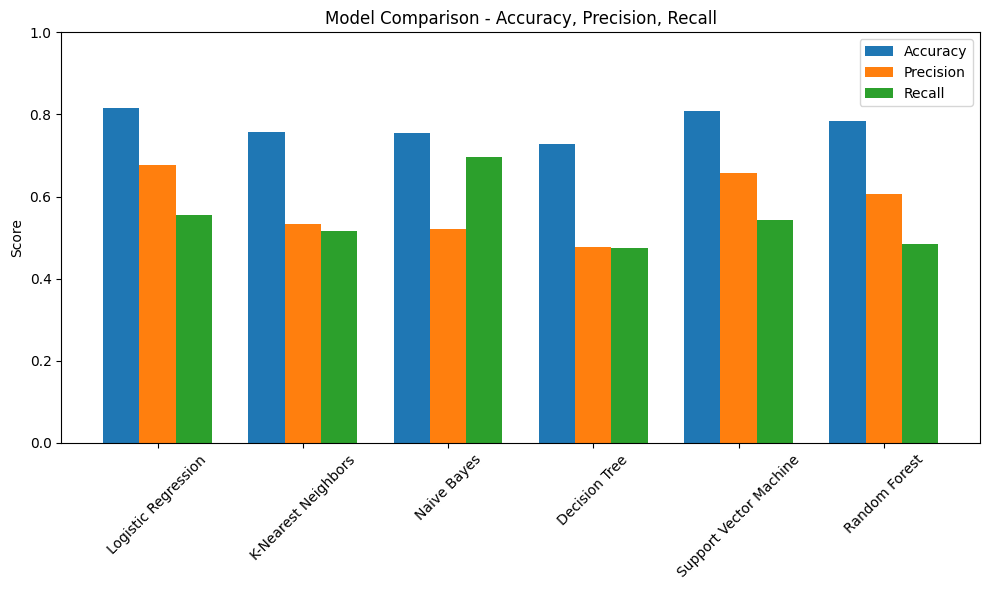

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create DataFrame
df_comparison = pd.DataFrame(model_comparison)

# Set figure size
plt.figure(figsize=(10, 6))

# Number of models
x = np.arange(len(df_comparison['Model']))

# Bar width
width = 0.25

# Plot bars for Accuracy, Precision, Recall
plt.bar(x - width, df_comparison['Accuracy'], width=width, label='Accuracy')
plt.bar(x, df_comparison['Precision'], width=width, label='Precision')
plt.bar(x + width, df_comparison['Recall'], width=width, label='Recall')

# Labels and title
plt.xticks(x, df_comparison['Model'], rotation=45)
plt.ylabel("Score")
plt.ylim(0, 1)  # Because these are metric scores between 0 and 1
plt.title("Model Comparison - Accuracy, Precision, Recall")
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()


# **Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_LR = cross_val_score(models['Logistic Regression'], X_train, y_train, cv=kf)
print("Logistic Regression Cross validation Accuracy:", cv_scores_LR)
print("Logistic Regression Cross validation mean Accuracy:", cv_scores_LR.mean())

Logistic Regression Cross validation Accuracy: [0.78438332 0.80922804 0.79236912 0.79236912 0.79928952]
Logistic Regression Cross validation mean Accuracy: 0.7955278242272275


In [ ]:
cv_scores_knn = cross_val_score(models['KNN'], X_train, y_train, cv=kf)
print("KNN Cross validation Accuracy:", cv_scores_knn)
print("KNN Cross validation mean Accuracy:", cv_scores_knn.mean())

KNN Cross validation Accuracy: [0.74622893 0.77196096 0.76574978 0.76929902 0.74866785]
KNN Cross validation mean Accuracy: 0.7603813075156698


In [ ]:
cv_scores_svm = cross_val_score(models['SVM'], X_train, y_train, cv=kf)
print("SVM Cross validation Accuracy:", cv_scores_svm)
print("SVM Cross validation mean Accuracy:", cv_scores_svm.mean())

SVM Cross validation Accuracy: [0.78438332 0.80567879 0.79414374 0.78881988 0.78774423]
SVM Cross validation mean Accuracy: 0.7921539918770815


In [ ]:
cv_scores_DT = cross_val_score(models['Decision Tree'], X_train, y_train, cv=kf)
print("Decision Tree Cross validation Accuracy:", cv_scores_DT)
print("Decision Tree Cross validation mean Accuracy:", cv_scores_DT.mean())

Decision Tree Cross validation Accuracy: [0.72404614 0.7364685  0.73913043 0.73114463 0.71669627]
Decision Tree Cross validation mean Accuracy: 0.7294971954338921


In [ ]:
cv_scores_forest = cross_val_score(models['Random Forest'], X_train, y_train, cv=kf)
print("Random Forest Cross validation Accuracy:", cv_scores_forest)
print("Random Forest Cross validation mean Accuracy:", cv_scores_forest.mean())

Random Forest Cross validation Accuracy: [0.78349601 0.79946761 0.78349601 0.78881988 0.77708703]
Random Forest Cross validation mean Accuracy: 0.786473307370674


## **Bagging**


In [ ]:
print(f"Accuracy of a simple Decision tree model :{df_comparison.loc[df_comparison['Model'] == 'Decision Tree', 'Accuracy'].iloc[0]}")
bagging_model_DT = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_DT.fit(X_train, y_train) # training the bagging model
y_pred_bagging_dt = bagging_model_DT.predict(X_test) #predict using the bagging
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
print(f"Accuracy of Bagging model :{accuracy_bagging_dt}")

Accuracy of a simple Decision tree model :0.7288857345635202
Accuracy of Bagging model :0.7771469127040455


In [ ]:
print(f"Accuracy of a simple Logistic Regression model :{df_comparison.loc[df_comparison['Model'] == 'Logistic Regression', 'Accuracy'].iloc[0]}")
bagging_model_LR = BaggingClassifier(
    estimator=LogisticRegression(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_LR.fit(X_train, y_train) # training the bagging model
y_pred_bagging_lr = bagging_model_LR.predict(X_test) #predict using the bagging
accuracy_bagging_lr = accuracy_score(y_test, y_pred_bagging_lr)
print(f"Accuracy of Bagging model :{accuracy_bagging_lr}")

Accuracy of a simple Logistic Regression model :0.8161816891412349
Accuracy of Bagging model :0.8126330731014905


In [ ]:
print(f"Accuracy of a simple k-NN model :{df_comparison.loc[df_comparison['Model'] == 'K-Nearest Neighbors', 'Accuracy'].iloc[0]}")
bagging_model_KNN = BaggingClassifier(
    estimator=KNeighborsClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_KNN.fit(X_train, y_train) # training the bagging model
y_pred_bagging_knn = bagging_model_KNN.predict(X_test) #predict using the bagging
accuracy_bagging_knn = accuracy_score(y_test, y_pred_bagging_knn)
print(f"Accuracy of Bagging model :{accuracy_bagging_knn}")

Accuracy of a simple k-NN model :0.7572746628814763
Accuracy of Bagging model :0.7714691270404542


In [ ]:
print(f"Accuracy of a simple Naive-Bayes model :{df_comparison.loc[df_comparison['Model'] == 'Naive Bayes', 'Accuracy'].iloc[0]}")
bagging_model_NB = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_NB.fit(X_train, y_train) # training the bagging model
y_pred_bagging_nb = bagging_model_NB.predict(X_test) #predict using the bagging
accuracy_bagging_nb = accuracy_score(y_test, y_pred_bagging_nb)
print(f"Accuracy of Bagging model :{accuracy_bagging_nb}")

Accuracy of a simple Naive-Bayes model :0.7551454932576295
Accuracy of Bagging model :0.752306600425834


In [ ]:
print(f"Accuracy of a simple SVM model :{df_comparison.loc[df_comparison['Model'] == 'Support Vector Machine', 'Accuracy'].iloc[0]}")
bagging_model_SVM = BaggingClassifier(
    estimator=SVC(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_SVM.fit(X_train, y_train) # training the bagging model
y_pred_bagging_svm = bagging_model_SVM.predict(X_test) #predict using the bagging
accuracy_bagging_svm = accuracy_score(y_test, y_pred_bagging_svm)
print(f"Accuracy of Bagging model :{accuracy_bagging_svm}")

Accuracy of a simple SVM model :0.808374733853797
Accuracy of Bagging model :0.8112136266855926


In [ ]:
print(f"Accuracy of a simple Random Forest model :{df_comparison.loc[df_comparison['Model'] == 'Random Forest', 'Accuracy'].iloc[0]}")
bagging_model_RF = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)

bagging_model_RF.fit(X_train, y_train) # training the bagging model
y_pred_bagging_rf = bagging_model_RF.predict(X_test) #predict using the bagging
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print(f"Accuracy of Bagging model :{accuracy_bagging_rf}")

Accuracy of a simple Random Forest model :0.7849538679914834
Accuracy of Bagging model :0.7998580553584103


## **Boosting**

In [ ]:
print(f"Accuracy of a simple Decision tree model :{df_comparison.loc[df_comparison['Model'] == 'Decision Tree', 'Accuracy'].iloc[0]}")

ada_boost_clf_DT = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_DT.fit(X_train, y_train) # model training
y_pred_ada_boost_dt = ada_boost_clf_DT.predict(X_test) # Model Prediction
accuracy_ada_boost_dt = accuracy_score(y_test, y_pred_ada_boost_dt)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_dt}")

Accuracy of a simple Decision tree model :0.7288857345635202
Accuracy of Boosting model :0.7359829666430092


In [ ]:
print(f"Accuracy of a simple Logistic Regression model :{df_comparison.loc[df_comparison['Model'] == 'Logistic Regression', 'Accuracy'].iloc[0]}")

ada_boost_clf_LR = AdaBoostClassifier(
    estimator=LogisticRegression(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_LR.fit(X_train, y_train) # model training
y_pred_ada_boost_lr = ada_boost_clf_LR.predict(X_test) # Model Prediction
accuracy_ada_boost_lr = accuracy_score(y_test, y_pred_ada_boost_lr)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_lr}")

Accuracy of a simple Logistic Regression model :0.8161816891412349
Accuracy of Boosting model :0.7409510290986515


In [ ]:
print(f"Accuracy of a simple Naive-Bayes model :{df_comparison.loc[df_comparison['Model'] == 'Naive Bayes', 'Accuracy'].iloc[0]}")

ada_boost_clf_NB = AdaBoostClassifier(
    estimator=GaussianNB(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_NB.fit(X_train, y_train) # model training
y_pred_ada_boost_nb = ada_boost_clf_NB.predict(X_test) # Model Prediction
accuracy_ada_boost_nb = accuracy_score(y_test, y_pred_ada_boost_nb)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_nb}")

Accuracy of a simple Naive-Bayes model :0.7551454932576295
Accuracy of Boosting model :0.759403832505323


In [ ]:
print(f"Accuracy of a simple SVM model :{df_comparison.loc[df_comparison['Model'] == 'Support Vector Machine', 'Accuracy'].iloc[0]}")

ada_boost_clf_SVM = AdaBoostClassifier(
    estimator=SVC(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_SVM.fit(X_train, y_train) # model training
y_pred_ada_boost_svm = ada_boost_clf_SVM.predict(X_test) # Model Prediction
accuracy_ada_boost_svm = accuracy_score(y_test, y_pred_ada_boost_svm)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_svm}")

Accuracy of a simple SVM model :0.808374733853797
Accuracy of Boosting model :0.7409510290986515


In [ ]:
print(f"Accuracy of a simple Random Forest model :{df_comparison.loc[df_comparison['Model'] == 'Random Forest', 'Accuracy'].iloc[0]}")

ada_boost_clf_RF = AdaBoostClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf_RF.fit(X_train, y_train) # model training
y_pred_ada_boost_rf = ada_boost_clf_RF.predict(X_test) # Model Prediction
accuracy_ada_boost_rf = accuracy_score(y_test, y_pred_ada_boost_rf)
print(f"Accuracy of Boosting model :{accuracy_ada_boost_rf}")

Accuracy of a simple Random Forest model :0.7849538679914834
Accuracy of Boosting model :0.7835344215755855


# **Stacking**

In [ ]:
model_LR_1 = LogisticRegression(max_iter=120)
model_KNN_1 = KNeighborsClassifier(n_neighbors=3)
model_SVM_1 = SVC()
model_DT_1 = DecisionTreeClassifier()
model_RF_1 = RandomForestClassifier()

# base models (models considered for stacking)
base_learners = [('LR', model_LR_1), ('DT', model_DT_1), ('kNN', model_KNN_1), ('SVM', model_SVM_1), ('RF', model_RF_1)]

# meta model (this can be any classification model)
meta_leaner = GaussianNB()

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_leaner) #stacking model building

stacking_clf.fit(X_train, y_train) # stacking model training
y_pred_stacking = stacking_clf.predict(X_test) # stacking model prediction

accuracy_stack = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy of stacking model :{accuracy_stack}')

Accuracy of stacking model :0.7821149751596878


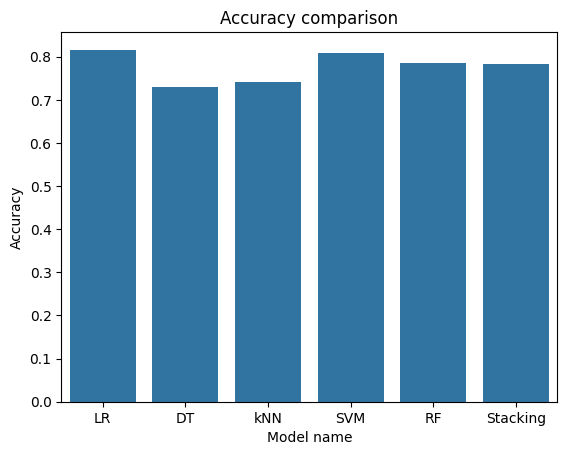

In [ ]:
# comparion of accuracy
results={} # dictionary to store (model_name)
for name, model in base_learners:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[name] = accuracy_score(y_test, y_pred)
  # populating 'results' dictionary with name of the model and accuracy

results['Stacking'] = accuracy_stack # adding the stack model accuracy to

sns.barplot(x= list(results.keys()), y= list(results.values()))
plt.title('Accuracy comparison')
plt.xlabel('Model name')
plt.ylabel('Accuracy')
plt.show()